##Performing EDA on the dataset found from make-my-trip site which is related to hotels:

Importing required libraries

In [11]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('makemytrip_com-travel_sample.csv')
df.head()

,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,...,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id
0,Hardasji Ki Magri,Udaipur,India,2016-06-21,{{facility}},|Zion Home Stay is located in a city that sets...,1 star,NaN,{{value}},no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,makemytrip,NaN,NaN,78ddf880bd7937d384ff278cc5b39d6e
1,Near Nai Gaon,Udaipur,India,2016-06-21,{{facility}},| Araliayas Resorts is a 3 star hotel located ...,3 star,NaN,{{value}},no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,makemytrip,NaN,NaN,9f9f9cbb2f7df8089b63d5cdeb257944
2,Near Bagore Ki Haveli,Udaipur,India,2016-06-21,{{facility}},|A 2 star property is located at 24 km from Ma...,2 star,NaN,{{value}},no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,NaN,makemytrip,NaN,NaN,b314bb7fa8bfb1ed306f517be21d729e
3,Dabok,Udaipur,India,2016-06-21,Airport Transfer|Car rental|Conference Hall|Cu...,|SNP House Airport Hotel And Restaurant is loa...,1 star,//imghtlak.mmtcdn.com/images/hotels/2014071815...,NaN,no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,`standard,/5,NaN,makemytrip,NaN,NaN,e6f5bb3c2d76a78d978b9ceb0e31ec56
4,East Udaipur,Udaipur,India,2016-06-21,{{facility}},| Hotel Pichola Haveli is situated in the beau...,2 star,NaN,{{value}},no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,3.7,makemytrip,NaN,NaN,63072c301427b6ca450d31eea127bcf0


##DATA PREPROCESSING

Droping unwanted features

In [4]:
df.drop(['crawl_date', 'highlight_value',"hotel_overview","mmt_holidayiq_review_count",'sitename', 'state',"mmt_review_rating"], axis=1, inplace=True)

In [5]:
df["traveller_rating"].value_counts().sort_values()
df

,area,city,country,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_location_rating,...,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,traveller_rating,uniq_id
0,Hardasji Ki Magri,Udaipur,India,1 star,NaN,{{value}},no,24.581788,73.667805,..,...,201302071713316867,Zion Home Stay,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,NaN,78ddf880bd7937d384ff278cc5b39d6e
1,Near Nai Gaon,Udaipur,India,3 star,NaN,{{value}},no,24.544342,73.644242,..,...,201312041703404727,Araliayas Resorts,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,NaN,9f9f9cbb2f7df8089b63d5cdeb257944
2,Near Bagore Ki Haveli,Udaipur,India,2 star,NaN,{{value}},no,24.579942,73.681953,..,...,201407171324437682,Shri Udai Palace,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,NaN,NaN,b314bb7fa8bfb1ed306f517be21d729e
3,Dabok,Udaipur,India,1 star,//imghtlak.mmtcdn.com/images/hotels/2014071815...,NaN,no,24.622607,73.855194,NaN,...,201407181538181173,SNP House Airport Hotel And Restaurant,Hotel,NaN,2016-06-21 04:06:50 +0000,`standard,/5,NaN,NaN,e6f5bb3c2d76a78d978b9ceb0e31ec56
4,East Udaipur,Udaipur,India,2 star,NaN,{{value}},no,24.580100,73.682200,..,...,201409021258573714,Hotel Pichola Haveli (LAKE SIDE),Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,3.7,NaN,63072c301427b6ca450d31eea127bcf0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,NaN,Gwalior,India,3,NaN,Tea/Coffee Maker|Study Table|Television|Direct...,no,26.208700,78.190600,Location:4.4,...,201411251209506701,The Bellevue,Hotel,2016-07-03 04:04:56 +0000,2016-07-03 04:04:56 +0000,Economic Grand|Executive Grand,NaN,NaN,Location:4.4/5 | Hospitality:3.6/5 | Facilitie...,12b69c836751be7f8bd2b245607bb2dd
2264,NaN,Haridwar,India,1,NaN,NaN,no,29.950700,78.164500,NaN,...,201411071930023467,Hotel Vishrant,Hotel,2016-07-03 04:04:56 +0000,2016-07-03 04:04:56 +0000,`standard,NaN,NaN,NaN,8574ec9db3d46b588923873530b91046
2265,NaN,Guruvayoor,India,1,NaN,NaN,no,10.194300,76.197200,NaN,...,20141021190620248,Vedic Village resort,Hotel,2016-07-03 04:04:56 +0000,2016-07-03 04:04:56 +0000,King And Queens Room,NaN,NaN,NaN,881f47078f5f7a2b34a00619f4a0143b
2266,NaN,Ferozepur,India,1,NaN,NaN,no,0.000000,0.000000,NaN,...,201606141524398766,GS Yatri Niwas,Hotel,2016-07-03 04:04:56 +0000,2016-07-03 04:04:56 +0000,`standard,NaN,NaN,NaN,149860cc5241394d5b475ecaa52d1f33


Modifying hotel_star_rating entries

In [6]:
df['hotel_star_rating']=df['hotel_star_rating'].replace('1 star',1).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('2 star',2).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('3 star',3).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('4 star',4).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('5 star',5).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('Four star',4).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('Three on 5',3).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('Four on 5',4).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('Five on 5',5).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].fillna(0).astype(str)
df.hotel_star_rating.value_counts()

1    1349
3     456
2     298
4     107
5      54
0       4
Name: hotel_star_rating, dtype: int64

In [7]:
df['site_review_rating']=df['site_review_rating'].fillna(0).astype(str)
df["traveller_rating"]=df.traveller_rating.fillna(0)
df["country"]=df.property_type.fillna("India")
df["area"]=df.area.fillna(df["city"])
df["property_type"]=df.property_type.fillna("Hotel")
df["room_types"]=df.property_type.fillna("Standard Room")
df.replace('..', np.NaN, inplace=True)
df.replace('', np.NaN, inplace=True)
df

,area,city,country,hotel_star_rating,image_urls,in_your_room,is_value_plus,latitude,longitude,mmt_location_rating,...,property_id,property_name,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,traveller_rating,uniq_id
0,Hardasji Ki Magri,Udaipur,Hotel,1,NaN,{{value}},no,24.581788,73.667805,NaN,...,201302071713316867,Zion Home Stay,Hotel,NaN,2016-06-21 04:06:50 +0000,Hotel,/5,4.5,0,78ddf880bd7937d384ff278cc5b39d6e
1,Near Nai Gaon,Udaipur,Hotel,3,NaN,{{value}},no,24.544342,73.644242,NaN,...,201312041703404727,Araliayas Resorts,Hotel,NaN,2016-06-21 04:06:50 +0000,Hotel,/5,4.5,0,9f9f9cbb2f7df8089b63d5cdeb257944
2,Near Bagore Ki Haveli,Udaipur,Hotel,2,NaN,{{value}},no,24.579942,73.681953,NaN,...,201407171324437682,Shri Udai Palace,Hotel,NaN,2016-06-21 04:06:50 +0000,Hotel,/5,0.0,0,b314bb7fa8bfb1ed306f517be21d729e
3,Dabok,Udaipur,Hotel,1,//imghtlak.mmtcdn.com/images/hotels/2014071815...,NaN,no,24.622607,73.855194,NaN,...,201407181538181173,SNP House Airport Hotel And Restaurant,Hotel,NaN,2016-06-21 04:06:50 +0000,Hotel,/5,0.0,0,e6f5bb3c2d76a78d978b9ceb0e31ec56
4,East Udaipur,Udaipur,Hotel,2,NaN,{{value}},no,24.580100,73.682200,NaN,...,201409021258573714,Hotel Pichola Haveli (LAKE SIDE),Hotel,NaN,2016-06-21 04:06:50 +0000,Hotel,/5,3.7,0,63072c301427b6ca450d31eea127bcf0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,Gwalior,Gwalior,Hotel,3,NaN,Tea/Coffee Maker|Study Table|Television|Direct...,no,26.208700,78.190600,Location:4.4,...,201411251209506701,The Bellevue,Hotel,2016-07-03 04:04:56 +0000,2016-07-03 04:04:56 +0000,Hotel,NaN,0.0,Location:4.4/5 | Hospitality:3.6/5 | Facilitie...,12b69c836751be7f8bd2b245607bb2dd
2264,Haridwar,Haridwar,Hotel,1,NaN,NaN,no,29.950700,78.164500,NaN,...,201411071930023467,Hotel Vishrant,Hotel,2016-07-03 04:04:56 +0000,2016-07-03 04:04:56 +0000,Hotel,NaN,0.0,0,8574ec9db3d46b588923873530b91046
2265,Guruvayoor,Guruvayoor,Hotel,1,NaN,NaN,no,10.194300,76.197200,NaN,...,20141021190620248,Vedic Village resort,Hotel,2016-07-03 04:04:56 +0000,2016-07-03 04:04:56 +0000,Hotel,NaN,0.0,0,881f47078f5f7a2b34a00619f4a0143b
2266,Ferozepur,Ferozepur,Hotel,1,NaN,NaN,no,0.000000,0.000000,NaN,...,201606141524398766,GS Yatri Niwas,Hotel,2016-07-03 04:04:56 +0000,2016-07-03 04:04:56 +0000,Hotel,NaN,0.0,0,149860cc5241394d5b475ecaa52d1f33


Plotting based on rating given by customers

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


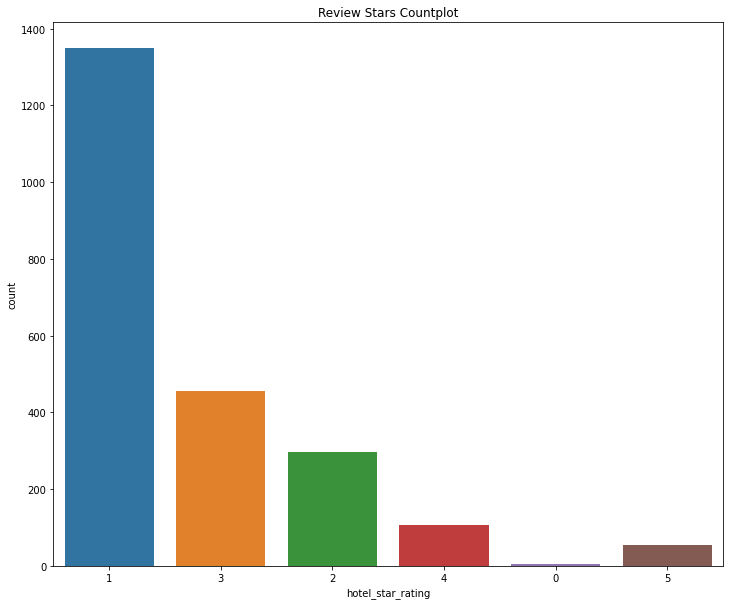

In [9]:
fig, ax = plt.subplots(figsize=(12,10))
sns.countplot(df['hotel_star_rating'], ax=ax)
plt.title('Review Stars Countplot')
plt.show()

###Analysing rating distribution among top 10 cities

<AxesSubplot:title={'center':'Count of Ratings based on Cities'}, xlabel='city'>

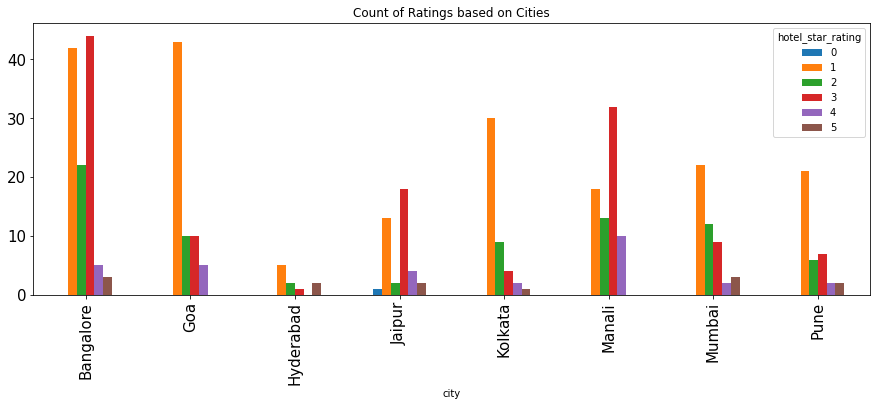

In [18]:
cities = ['NewDelhiAndNCR','Goa','Mumbai','Jaipur','Bangalore','Hyderabad','Srinagar', 'Pune', 'Kolkata', 'Manali']
cities_df = df.loc[df['city'].isin(cities)]
s = pd.crosstab(index = cities_df['city'], columns = cities_df['hotel_star_rating'])
bar = s.plot(kind='bar',figsize=(15,5),title='Count of Ratings based on Cities',fontsize=15)
bar

<AxesSubplot:title={'center':'Cities having Maximum Reviews'}, ylabel='city'>

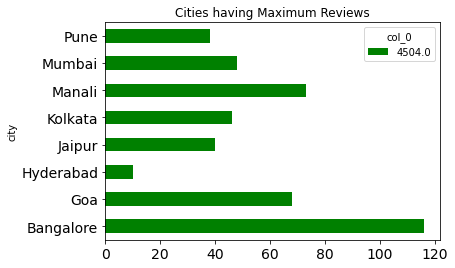

In [19]:
mmt_df = cities_df['city'].groupby(cities_df.mmt_review_count)
kk = pd.crosstab(index = cities_df['city'], columns = cities_df['mmt_review_count'].sum())
kk.plot(kind='barh',title='Cities having Maximum Reviews', fontsize=14, color = 'green')

#Conclusion
------------

###From the dataset found from makemytrip derived the above insights based on ratings given by customers and also reviews. Also performed analysis among top 10 cities.First plot shows how many hotels are there in dataset based on number of stars rated for it. That how many 1 star, 2 star...5 star rating hotels are there in that city.